<a href="https://colab.research.google.com/github/iamsanthoshg/colabFiles/blob/main/Chunking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain


In [ ]:
from google.colab import drive

# Mount Google Drive to access the files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to your file in Google Drive
file_path = '/content/drive/My Drive/Langchain/speech.txt'

# Read the content of the uploaded file
with open(file_path, 'r') as file:
    document = file.read()


#CharacterTextSplitter

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

# Initialize the text splitter with chunk size and overlap
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=0)

# Split the document into chunks
texts = text_splitter.split_text(document)

# Print the resulting chunks
for idx, chunk in enumerate(texts):
    print(f"Chunk {idx + 1}:\n{chunk}\n")


Chunk 1:
The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.

Chunk 2:
Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.

Chunk 3:
…

Chunk 4:
It will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairness because we act without animus, 

#Recursive Character TextSplitter


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=0,
)

# Split the document into chunks
texts = text_splitter.split_text(document)

# Print the resulting chunks
for idx, chunk in enumerate(texts):
    print(f"Chunk {idx + 1}:\n{chunk}\n")

Chunk 1:
The world must be made safe for democracy. Its peace must be planted upon the tested foundations of

Chunk 2:
political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no

Chunk 3:
indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are

Chunk 4:
but one of the champions of the rights of mankind. We shall be satisfied when those rights have

Chunk 5:
been made as secure as the faith and the freedom of nations can make them.

Chunk 6:
Just because we fight without rancor and without selfish object, seeking nothing for ourselves but

Chunk 7:
what we shall wish to share with all free peoples, we shall, I feel confident, conduct our

Chunk 8:
operations as belligerents without passion and ourselves observe with proud punctilio the

Chunk 9:
principles of right and of fair play we profess to be fighting for.

Chunk 10:
…

Chunk 11:
It will be all the easier for us to conduct ourselves as belligerent

#SemanticChunking(Custom)

In [ ]:
pip install langchain langchain-community sentence-transformers


In [ ]:
file_path = '/content/drive/My Drive/Langchain/speech.txt'


In [ ]:
from langchain.document_loaders import TextLoader

# Load text from a file
loader = TextLoader("/content/drive/My Drive/Langchain/speech.txt")
docs = loader.load()


In [ ]:
print(docs)

[Document(metadata={'source': '/content/drive/My Drive/Langchain/speech.txt'}, page_content='The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.\n\nJust because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.\n\n…\n\nIt will be all the easier for us to conduct ourselves as belligerents in a hi

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm




In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from sentence_transformers import util
import spacy

with open(file_path, 'r') as file:
    document = file.read()
text = document


nlp = spacy.load("en_core_web_sm")

sentences = [sent.text for sent in nlp(text).sents]

# Load Hugging Face embeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Generate sentence embeddings
sentence_embeddings = embedding_model.embed_documents(sentences)

# Compute pairwise cosine similarity between sentences
similarity_threshold = 0.6  # Adjust based on use case
chunks = []
current_chunk = [sentences[0]]

for i in range(1, len(sentences)):
    similarity = util.pytorch_cos_sim(sentence_embeddings[i-1], sentence_embeddings[i]).item()

    if similarity > similarity_threshold:
        current_chunk.append(sentences[i])
    else:
        chunks.append(" ".join(current_chunk))
        current_chunk = [sentences[i]]

# Add the last chunk
if current_chunk:
    chunks.append(" ".join(current_chunk))

# Print the chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:\n{chunk}\n")


<ipython-input-13-490e468d9afa>:15: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public model

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Chunk 1:
The world must be made safe for democracy.

Chunk 2:
Its peace must be planted upon the tested foundations of political liberty.

Chunk 3:
We have no selfish ends to serve.

Chunk 4:
We desire no conquest, no dominion.

Chunk 5:
We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make.

Chunk 6:
We are but one of the champions of the rights of mankind.

Chunk 7:
We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them.



Chunk 8:
Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for.

…

It will be all the easier for us to conduct ourselves as belligerents in a high spirit of right 

#SemanticChunker from Langchain_experimental

In [ ]:
!pip install langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_community.embeddings import HuggingFaceEmbeddings

# Load embeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Initialize SemanticChunker
chunker = SemanticChunker(embedding_model)

# Perform semantic chunking
chunks = chunker.split_text(text)

# Print the chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:\n{chunk}\n")


Chunk 1:
The world must be made safe for democracy. Its peace must be planted upon the tested foundations of political liberty. We have no selfish ends to serve. We desire no conquest, no dominion. We seek no indemnities for ourselves, no material compensation for the sacrifices we shall freely make. We are but one of the champions of the rights of mankind. We shall be satisfied when those rights have been made as secure as the faith and the freedom of nations can make them. Just because we fight without rancor and without selfish object, seeking nothing for ourselves but what we shall wish to share with all free peoples, we shall, I feel confident, conduct our operations as belligerents without passion and ourselves observe with proud punctilio the principles of right and of fair play we profess to be fighting for. …

It will be all the easier for us to conduct ourselves as belligerents in a high spirit of right and fairness because we act without animus, not in enmity toward a people

**Breakpoints:**
Percentile,
Standard Deviation,
Interquartile,
Gradient

Percentile, Standard Deviation, Interquartile, and Gradient refer to different strategies for computing breakpoints based on similarity scores between sentences. These methods control how and where chunking decisions are made based on the distribution of similarity scores.
See this [SemanticChunker](https://python.langchain.com/docs/how_to/semantic-chunker/)

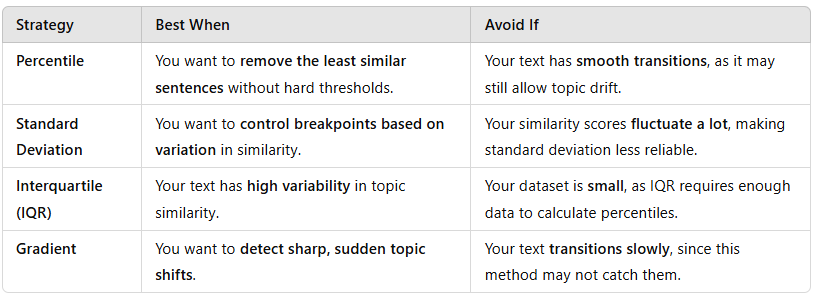